In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from sklearn.cluster import KMeans
import os

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mnist = pd.read_csv('/content/drive/My Drive/Dataset/mnist_test.csv')

In [ ]:
np.random.seed(1)
n_sam = 50
mnist50 = pd.DataFrame(columns=mnist.columns, dtype='int64')
indexes = []
for i in range(10):
    samples = mnist[mnist.label==i].sample(n_sam, replace=False)
    mnist50 = pd.concat([mnist50, samples], ignore_index=True)
    indexes.append(list(samples.index))

In [ ]:
X = mnist50.drop(['label'], axis=1)
y = mnist50.label

In [ ]:
#Plot mnist image
def plot_mnist(img, label=''):
    plt.imshow(img.reshape((28,28)), cmap='gray')
    plt.title(str(label))
    plt.xticks([])
    plt.yticks([])

#Plot mnist in coordinate form
def plot_coord(coord, marker='o', lim=(-1,29)):
    plt.scatter(coord[:,0], coord[:,1], marker=marker)
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xticks([])
    plt.yticks([])

In [ ]:
np.random.seed(0)
n_sam = 8
samples = {i:y[y==i].sample(n_sam, replace=False).index for i in range(10)}
plt.figure(figsize=(15,20))
for i in range(10*n_sam):
    dig, sam = i//n_sam, i%n_sam
    plt.subplot(10,n_sam,i+1)
    img = X.iloc[samples[dig][sam]].values.reshape((28,28))
    plot_mnist(img, y[samples[dig][sam]])

In [ ]:
features = mnist.drop('label', axis=1)
label = mnist.label

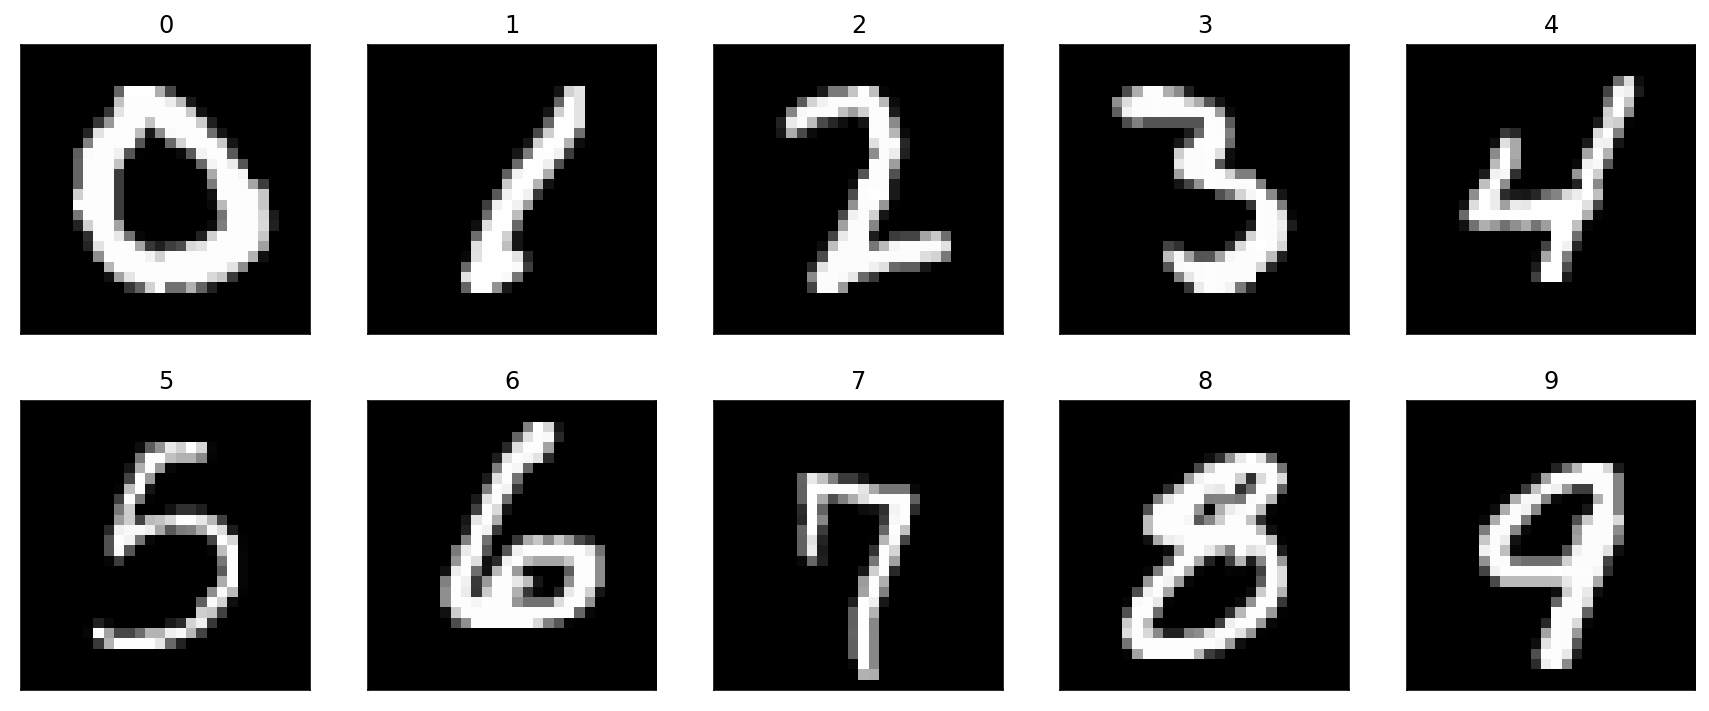

In [ ]:
np.random.seed(31)
r, c = 2, 5
samp_ind = [label[label==i].sample(1, replace=False).index[0] for i in range(10)]
plt.figure(figsize=(15,6))
for i in range(r*c):
    plt.subplot(r,c,i+1)
    dig, sam = i//n_sam, i%n_sam
    img = features.iloc[samp_ind[i]].values.reshape((28,28))
    plot_mnist(img, label.iloc[samp_ind[i]])

In [ ]:
from sympy.utilities.iterables import multiset_permutations
import numpy as np
order=np.array([[4,1,6,3,2,5,7,0],#0
                [7,2,5,0,3,4,1,6],#1
                [5,1,6,3,2,4,7,0],#2
                [2,5,0,6,7,3,4,1],#3
                [7,5,0,2,1,3,4,6],#4
                [4,0,5,6,3,1,2,7],#5
                [7,1,3,0,4,2,5,6],#6
                [2,7,1,5,4,6,0,3],#7
                [4,0,7,1,5,3,6,2],#8
                [4,3,6,2,5,0,1,7]])#9

num_clusters = 8

thld = np.array([70,98,100,110,50,80,100,60,100,70])
#                0   1   2   3  4  5   6  7   8  9

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

perm = np.array(list(multiset_permutations(range(num_clusters))))

def img2coord(img, scale = 28, pixval_min=0):
    r, c = np.where(img.reshape((28,28))>pixval_min)
    x_coor, y_coor = (c.astype('int64'), (28-r).astype('int64'))
    xycoors = np.concatenate((x_coor.reshape(-1,1), y_coor.reshape(-1,1)), axis=1)
    return xycoors
def mnist2clusters(img, pixval_min=0, scale=28):
    xycoors = img2coord(img, scale=scale, pixval_min=pixval_min)
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(xycoors)
    return kmeans, xycoors

def plot_clusters(kmeans, xycoors, marker='o', lim=(-1,29)):
    pred = kmeans.predict(xycoors)
    plt.scatter(xycoors[:,0], xycoors[:,1], c=pred, cmap='Dark2', marker=marker)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*',color='k')
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xticks([])
    plt.yticks([])

def calculateCentroid():
    centroids=np.zeros((10,num_clusters,2))
    if os.path.isfile("centroids.npy"):
        centroids = np.load("centroids.npy")
        average_mnist = mnist.groupby('label').mean().astype('int64').values
        r, c = 2, 5
        plt.figure(figsize=(15,6))
        for i in range(r*c):
            plt.subplot(r,c,i+1)
            img = average_mnist[i]
            img[img<thld[i]] = 0
            plot_mnist(img)
        plt.show()
        plt.figure(figsize=(15,6))
        for i in range(r*c):
            plt.subplot(r,c,i+1)
            img= average_mnist[i]
            img[img<thld[i]] = 0
            kmt,xy = mnist2clusters(img, pixval_min=thld[i])
            plot_clusters(kmt,xy)
    else:
        average_mnist = mnist.groupby('label').mean().astype('int64').values
        r, c = 2, 5
        plt.figure(figsize=(15,6))
        for i in range(r*c):
            plt.subplot(r,c,i+1)
            img = average_mnist[i]
            img[img<thld[i]] = 0
            plot_mnist(img)
        plt.show()
        plt.figure(figsize=(15,6))
        for i in range(r*c):
            plt.subplot(r,c,i+1)
            img= average_mnist[i]
            img[img<thld[i]] = 0
            kmt,xy = mnist2clusters(img, pixval_min=thld[i])
            plot_clusters(kmt,xy)
            centroids[i] = kmt.cluster_centers_
        np.save("centroids.npy", centroids)
    return centroids

def plot_mnist(img, label=''):
    plt.imshow(img.reshape((28,28)), cmap='gray')
    plt.title(str(label))
    plt.xticks([])
    plt.yticks([])

def plot_coord(coord, marker='o', lim=(-1,29)):
    plt.scatter(coord[:,0], coord[:,1], marker=marker)
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xticks([])
    plt.yticks([])

def mse(c1, c2):
    return np.mean((c1-c2)**2)

def mse_centroids(centroid_indx, tmplt, centroids):
    return mse(tmplt, centroids[perm[centroid_indx]])

def minimize(tmplt, centroids):
    mse_val = [mse_centroids(i, tmplt, centroids) for i in range(len(perm))]
    return centroids[perm[np.argmin(mse_val)]], perm[np.argmin(mse_val)]

def feature_extractor(img, label, centroids, return_clusters=False):
    tmplt = centroids[label][order[label]]
    km, xy = mnist2clusters(img, pixval_min=thld[label])
    points8, _ = minimize(tmplt, km.cluster_centers_.astype('float64'))
    if return_clusters:
        return points8, km, xy
    return points8

def form_clusters(points8, xy):
    clusters = [[] for i in range(num_clusters)]
    for i in range(len(xy)):
        mse_val = [mse(xy[i], points8[j]) for j in range(len(points8))]
        ind = np.argmin(mse_val)
        clusters[ind].append(xy[i])
    for i in range(1,len(clusters)):
        clusters[i].extend(clusters[i-1])
    clusters = np.array(clusters,dtype="object")
    return clusters

def plot_exfeatures(coord, marker='--o', c='tab:blue',lim=(-1,29)):
    plt.plot(coord[:,0],coord[:,1], marker, color=c)
    plt.scatter(coord[0,0],coord[0,1], marker='s', color=c)
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xticks([])
    plt.yticks([])

def get_boundary(coord):
    xmin = coord[:,0].min()
    xmax = coord[:,0].max()
    ymin = coord[:,1].min()
    ymax = coord[:,1].max()
    return xmin,ymin,xmax,ymax

def scale_centroid(coord):
    xmin,ymin,xmax,ymax = get_boundary(coord)
    x_o = (xmax + xmin)/2
    y_o = (ymax + ymin)/2
    coord = coord - [x_o,y_o]
    sc = 28/100
    coord *= sc
    coord += 14
    return coord.astype('int64')

def scale(coord):
    xmin,ymin,xmax,ymax = get_boundary(coord)
    x_o = (xmax + xmin)/2
    y_o = (ymax + ymin)/2
    coord = coord - [x_o,y_o]
    sc = 28/max(xmax-xmin, ymax-ymin)
    coord *= sc
    coord += 14
    return coord.astype('int64')

def coord2img(xy, feat, ind, dataset):
    print(feat.shape, dataset.shape)
    zero_data = np.zeros(shape=(1,feat.shape[1]))
    d = pd.DataFrame(zero_data, columns=feat.columns)
    d = np.array(d.values).reshape((28,28))
    img = np.array(dataset.iloc[ind].values).reshape((28,28))
    for a,b in xy:
        d[28-b][a] = img[28-b][a]
    return d
    
def plot_seq(kms, clusters, ind, dataset, marker='o', lim=(-1,29)):
    plt.figure(figsize=(6,12))
    for i in range(len(clusters)):
        plt.subplot(4,2,i+1)
        xy = np.array(clusters[i])
        i = coord2img(xy, features, ind, dataset)
        print(i.shape)
        plot_mnist(i)
        plt.xlim(lim)
        plt.ylim(lim)
        plt.xticks([])
        plt.yticks([])
def plot_embeddings(coord, word2Ind, words, marker = '--o', c = 'tab:blue', lim = (-1,29)):
    """ 
        Plot in a scatterplot the embeddings of the words specified in the list "words".
        Include a label next to each point.
    """
    word2Ind = list(word2Ind)
    for word in words:
        x, y = coord[word2Ind[word]]
        plt.text(x+.03, y+.03, word, fontsize=11)


def generate_image(kms, clusters, ind, dataset):
    images = np.empty((0,28,28), int)
    for i in range(len(clusters)):
        xy = np.array(clusters[i])
        i = coord2img(xy, features, ind, dataset)
        images = np.append(images, np.array([i]), axis=0)
    return images

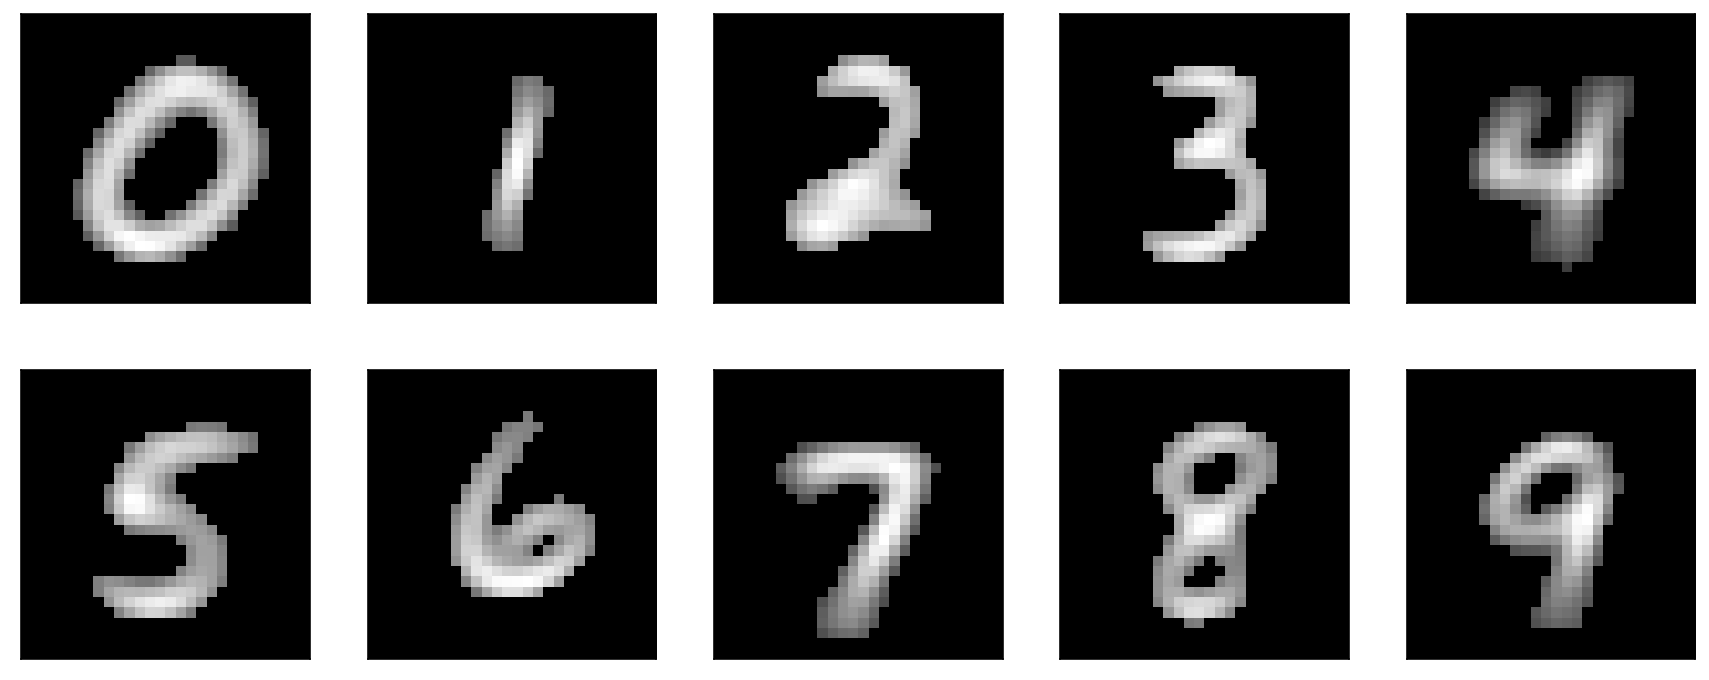

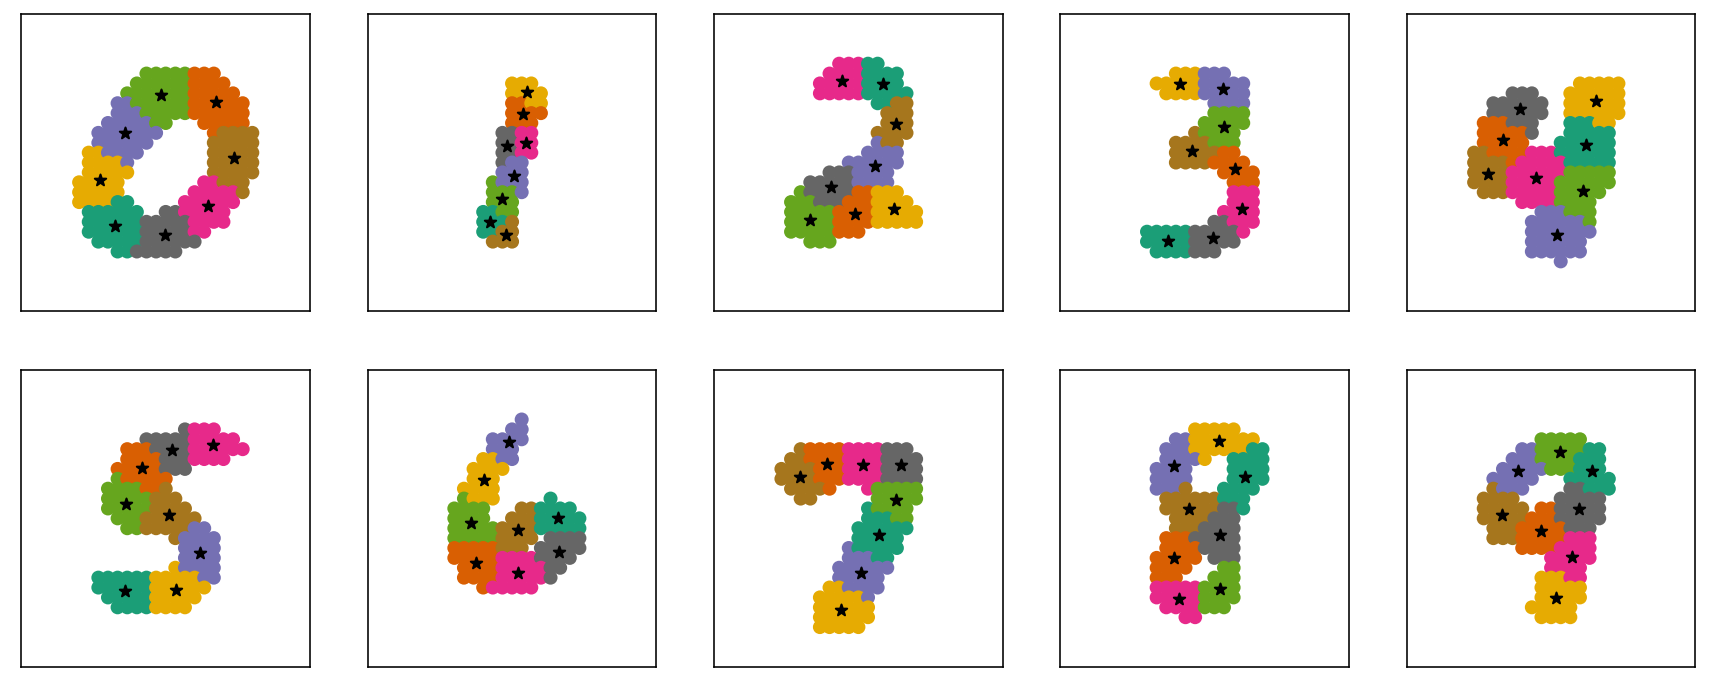

In [ ]:
centroids = calculateCentroid()
# centroids = scale_centroid(centroids)

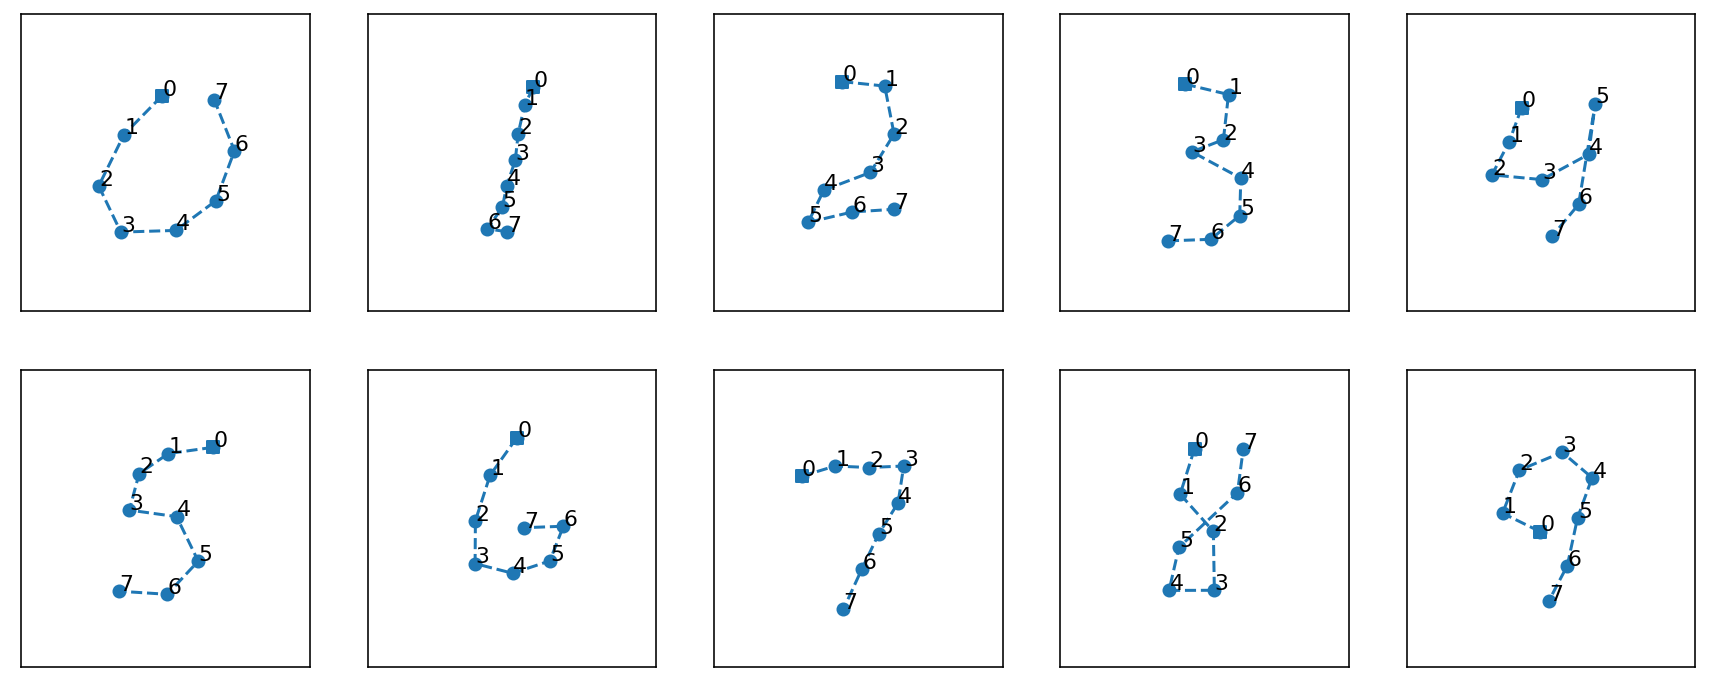

In [ ]:
n = [0,1,2,3,4,5,6,7]
l = {key: i for i, key in enumerate(n)}
plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    tmplt = centroids[i][order[i]]
    plot_embeddings(tmplt,l,n)
    plot_exfeatures(tmplt)
plt.show()

In [ ]:
tmplt_0 = centroids[3][order[3]]
# print(tmplt_0)
img_0 = img2coord(features.iloc[30].values, pixval_min=thld[0])
km0, xy0 = mnist2clusters(features.iloc[30].values, pixval_min=thld[i])
plot_clusters(km0, xy0)
plt.scatter(tmplt_0[:,0], tmplt_0[:,1], marker='^',color='b')

NameError: ignored

In [ ]:
np.random.seed(0)
indx=300
# plt.figure(figsize=(15,5))
# plt.subplot(1,3,1)
# plot_mnist(features.iloc[indx].values)
pts, kms, xys = feature_extractor(features.iloc[indx].values, label[indx], centroids, return_clusters=True)
clusters = form_clusters(pts,xys)
# print(clusters)
# print(kms.cluster_centers_)
# print(pts)
# print(kms)
# plot_seq(kms, xys, indx)
# plt.subplot(1,3,2)
# p = np.array(clusters[2])
# plot_clusters(kms, xys)
# plt.subplot(1,3,3)
# plot_exfeatures(pts)
plot_seq(kms, clusters, indx)
# plt.show()

TypeError: ignored

In [ ]:
mnist_pendigits = pd.DataFrame(columns=['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8'],dtype='int64')
np.random.seed(17)
for i in range(len(features)):
    pts, kms, xys = feature_extractor(features.iloc[i].values, label[i], centroids, return_clusters=True)
    mnist_pendigits.loc[i]=scale(pts).reshape(-1)
    if i%50==0:
        print(i)
mnist_pendigits.head()

0


KeyboardInterrupt: ignored

In [ ]:
mnist_pendigits['label']=label

NameError: ignored

In [ ]:
mnist_pendigits.to_csv('mnist_to_pendigits.csv',index=False)

<class 'numpy.ndarray'>


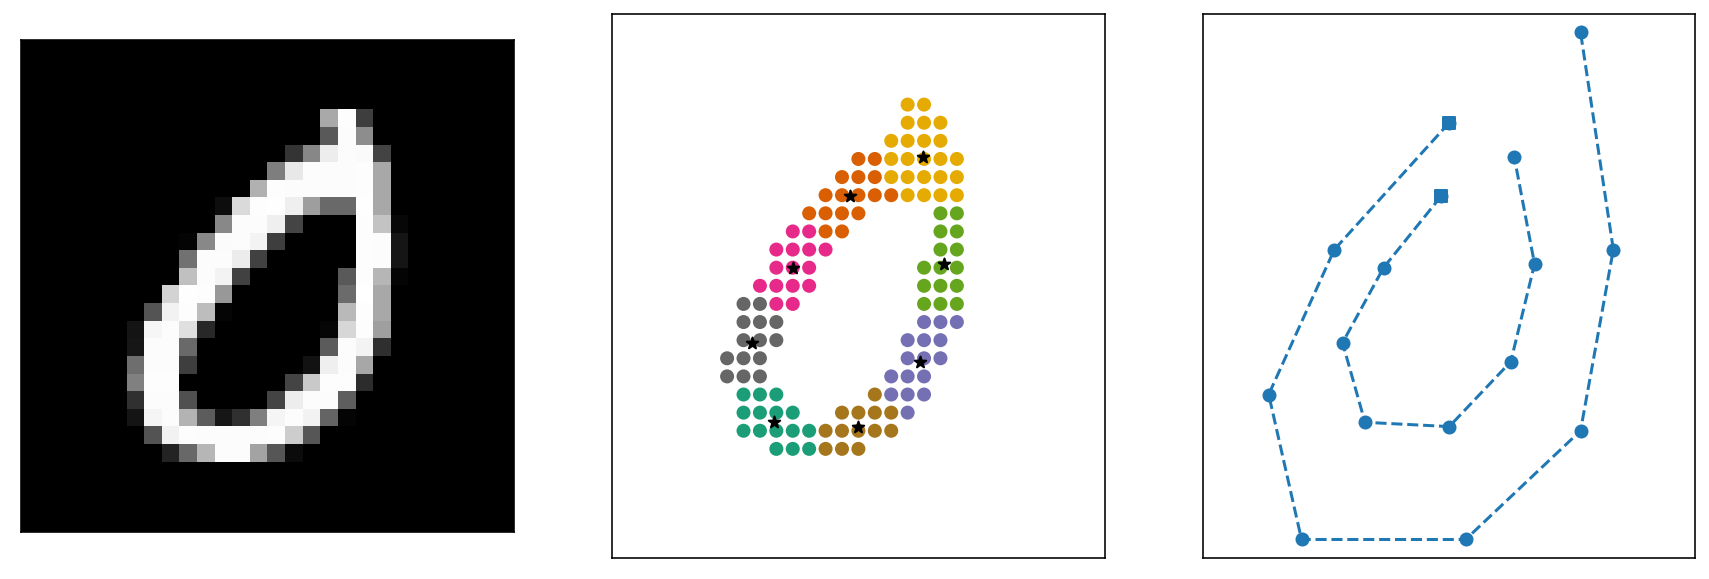

In [ ]:
indx=0
np.random.seed(0)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plot_mnist(features.iloc[indx].values)
pts, kms, xys = feature_extractor(features.iloc[indx].values, label[indx], centroids, return_clusters=True)
plt.subplot(1,3,2)
plot_clusters(kms, xys)
plt.subplot(1,3,3)
plot_exfeatures(pts)
plot_exfeatures(scale(pts))
print(type(pts))
plt.show()

In [ ]:
mnist_complete = pd.DataFrame(mnist, columns=mnist.columns, dtype='int64')
average_mnist = mnist.groupby('label').mean().astype('int64').values
for i in range(len(average_mnist)):
    average_mnist[i][average_mnist[i]<thld[i]] = 0
average = np.empty([10,785], dtype = 'int')
for i in range(10):
     average[i]= np.append(i, average_mnist[i])
average = pd.DataFrame(average, columns = mnist_complete.columns, dtype = 'int64')
mnist_complete = pd.concat([mnist_complete, average], axis = 0, ignore_index = True)
label_complete = mnist_complete.label
mnist_complete = mnist_complete.drop(['label'],axis = 1)

In [ ]:
def load_dataset_from_sklearn(X, y):
    X = np.array(X)
    y = np.array(y)
    data = []
    labels = []
    data_reshaped = []
    data, labels = X, y
    data_reshaped = data.reshape(-1, 1, 28, 28).transpose(0, 1, 3, 2)
    print(("done"))
    return data, data_reshaped / np.float32(255), labels

In [ ]:
from sklearn.manifold import TSNE
class Number:
    def __init__(self, x, y, index, val):
        self.x = x
        self.y = y
        self.index = index
        self.val = val

    def get_x(self):
        return self.x

    def get_y(self):
        return self.y

    def get_index(self):
        return self.index

    def get_val(self):
        return self.val

    def distance(self, point):
        import math
        return math.sqrt(math.pow(self.get_x() - point.get_x(),2) + 
                         math.pow(self.get_y() - point.get_y(),2))

    def encapsulate_numbers(legend_array, img_embed):
        numbers = []
        for i in range(len(legend_array)):
            x_coo = img_embed[i,:][0]
            y_coo = img_embed[i,:][1]
            number = Number(x_coo, y_coo, i, legend_array[i])
            numbers.append(number)
        return numbers


    def neighbours(numbers, same_digit, neighbourhood):
        """
        # same_digit: a boolean. If False, it searches for different numbers 
                                who look like similar.
                                If True, it searches for two similar 
                                representations of the same number.
        # neighbourhood: a tuple. (min_distance, max_distance). 
                        min_distance xor max_distance can be None.
        """
        min_distance = neighbourhood[0]
        max_distance = neighbourhood[1]

        if (min_distance == None and max_distance == None):
            raise ValueError("Just one beetween min_distance and max_distance can be None")

        if (min_distance != None):
            min_distance = neighbourhood[0]
        else:
            min_distance = 0

        if (max_distance != None):
            max_distance = neighbourhood[1]
        else:
            max_distance = 5

        nbs = []
        for num1 in numbers:
            if (num1.get_index() % 1000 == 0):
                print(num1.get_index())
            for num2 in numbers:
                same = True
                if (not same_digit):
                    same = num1.get_val() != num2.get_val()
                else:
                    same = num1.get_val() == num2.get_val()
                if (num1.get_index() != num2.get_index() and
                        min_distance <= num1.distance(num2) <= max_distance and
                        same):
                    nbs.append((num1, num2))
        return nbs

def perform_tSNE(data, path_tSNE=''):
    img_embed = None
    if os.path.isfile("img_embed.npy"):
        print("Loading existing t-SNE embedding from file system")
        img_embed = np.load("img_embed.npy")
        print("done")
    else:
        print("Performing t-SNE on a dataset of shape "+str(data.shape)+"...")
        tsne = TSNE(n_components=2, perplexity = 30, n_iter = 5000, random_state = 0)
        img_embed = tsne.fit_transform(data)
        np.save("img_embed.npy", img_embed)
    return img_embed

def perform_KMeans(embedding, labels, n_clusters):
    print("Performing KMeans. K =",n_clusters)
    clusters_dimension = [0]*n_clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embedding)
    distances = KMeans(n_clusters=n_clusters, random_state=0).fit_transform(embedding)
    for i in kmeans.labels_:
            clusters_dimension[i]+=1
    clusters = [ [] for i in range(n_clusters)]
    pos = 0
    for i in kmeans.labels_:
            clusters[i].append(Number(embedding[pos][0], embedding[pos][1], pos, labels[pos]))
            pos+=1

    med = np.argmin(distances, axis=0)
    clusters_others = {}
    for i in range(len(clusters)):
        cluster = clusters[i]
        medoid = med[i]
        others = [x.get_index() for x in cluster if x.get_val()!=str(labels[medoid])]
        clusters_others[medoid]=others

    return clusters, clusters_others

def calculateDistance(x, y):
    import math
    return math.sqrt(math.pow(x.d1-y.d1,2) + math.pow(x.d2-y.d2,2))

In [ ]:
data, reshaped_data, labels = load_dataset_from_sklearn(mnist_complete, label_complete)
img_embed = perform_tSNE(data)

done


In [ ]:
data.shape

(10010, 784)

In [ ]:
clusters, cluster_others = perform_KMeans(img_embed, label_complete, 10)

Performing KMeans. K = 10


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


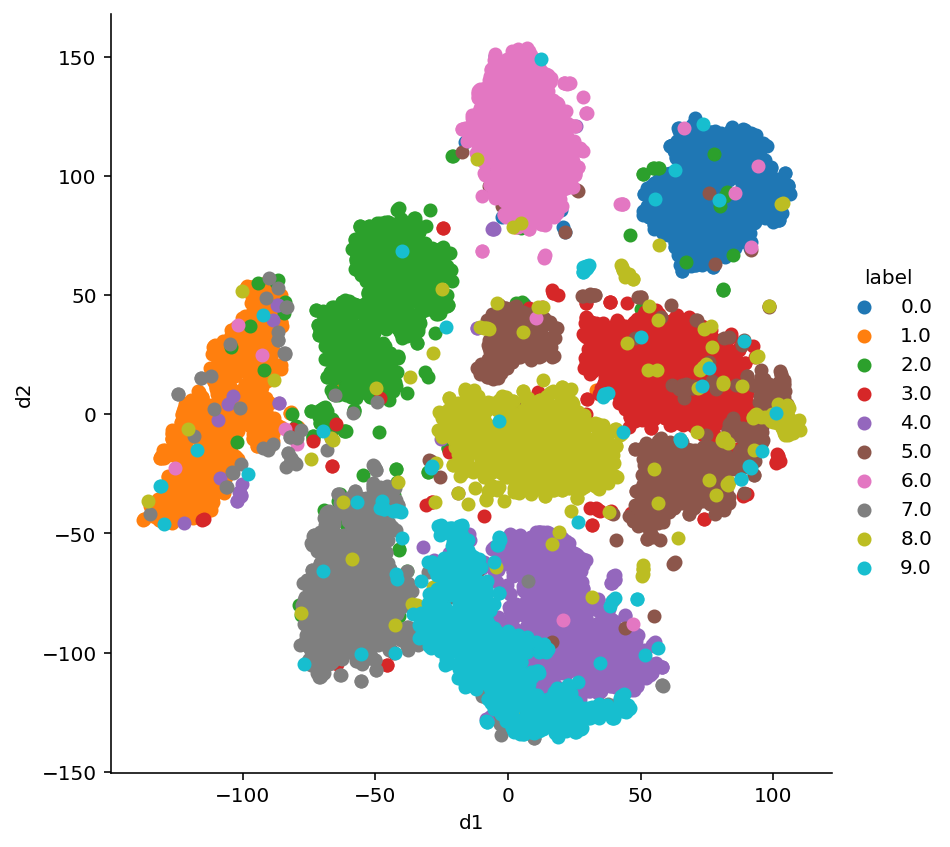

In [ ]:
import seaborn as sn
tsne_data = np.vstack((img_embed.T, label_complete)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("d1","d2","label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "d1","d2").add_legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


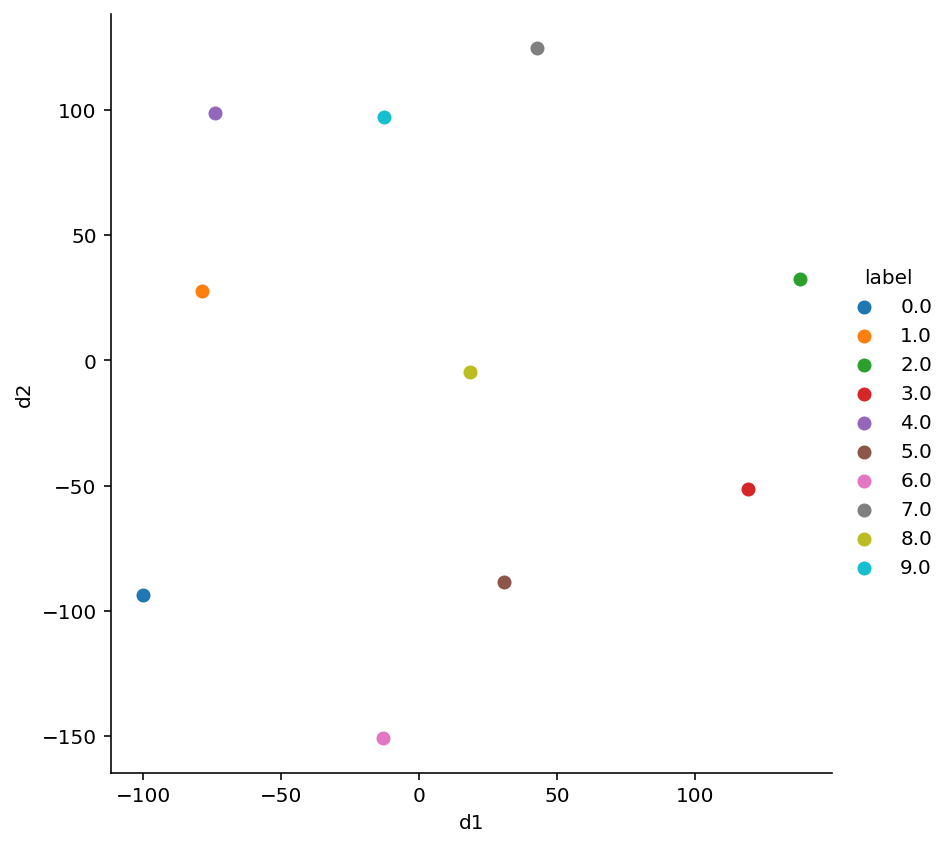

In [ ]:
import seaborn as sn
tsne_data = np.vstack((img_embed[-10:].T, label_complete[-10:])).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ("d1","d2","label"))
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, "d1","d2").add_legend()
plt.show()

In [ ]:
#Change 60000 to 10000 for test data.
def get_radius(tsne_df):
    mn_distance = []
    mx_distance = []
    average_distance = []
    radius = []
    neighbour_distance = []
    for i in range(10):
        num = tsne_df.iloc[i+10000]   #Make changes here
        temp_df = tsne_df[tsne_df.label==i]
        total_distance = 0
        mx = -np.inf
        mn = np.inf
        for j in range(len(temp_df)):
            n = temp_df.iloc[j]
            d = calculateDistance(num, n)
            total_distance+=d
            mx = max(mx, d)
            mn = min(mn, d)
        mn_distance.append(mn)
        mx_distance.append(mx)
        average_distance.append(np.mean([mn,mx]))
        radius.append(total_distance/len(temp_df))
        neighbour_distance.append(min(average_distance[-1],radius[-1]))
    return min(neighbour_distance)/1.5


In [ ]:
#Change 60000 to 10000 for test data.

def get_datapoints(df):
    radius = get_radius(df)
    indx = []
    df['ind'] = df.index
    for i in range(10):
        num = df.iloc[i+10000]    #Make changes here
        temp_df = df[df.label==i]
        for j in range(len(temp_df)):
            n = temp_df.iloc[j]
            d = calculateDistance(num, n)
            if(d<=radius and n.ind<10000):    #Make changes here
            indx.append(n.ind)
    correct_datapoints = pd.DataFrame(mnist.iloc[indx], columns=mnist.columns, dtype='int64')
    correct_tsnedf = pd.DataFrame(df.iloc[indx], columns=df.columns)
    correct_tsnedf = correct_tsnedf.drop(["ind"], axis=1)
    return correct_datapoints, correct_tsnedf

In [ ]:
df = tsne_df.copy()
correct_datapoints, correct_tsnedf = get_datapoints(df)

NameError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


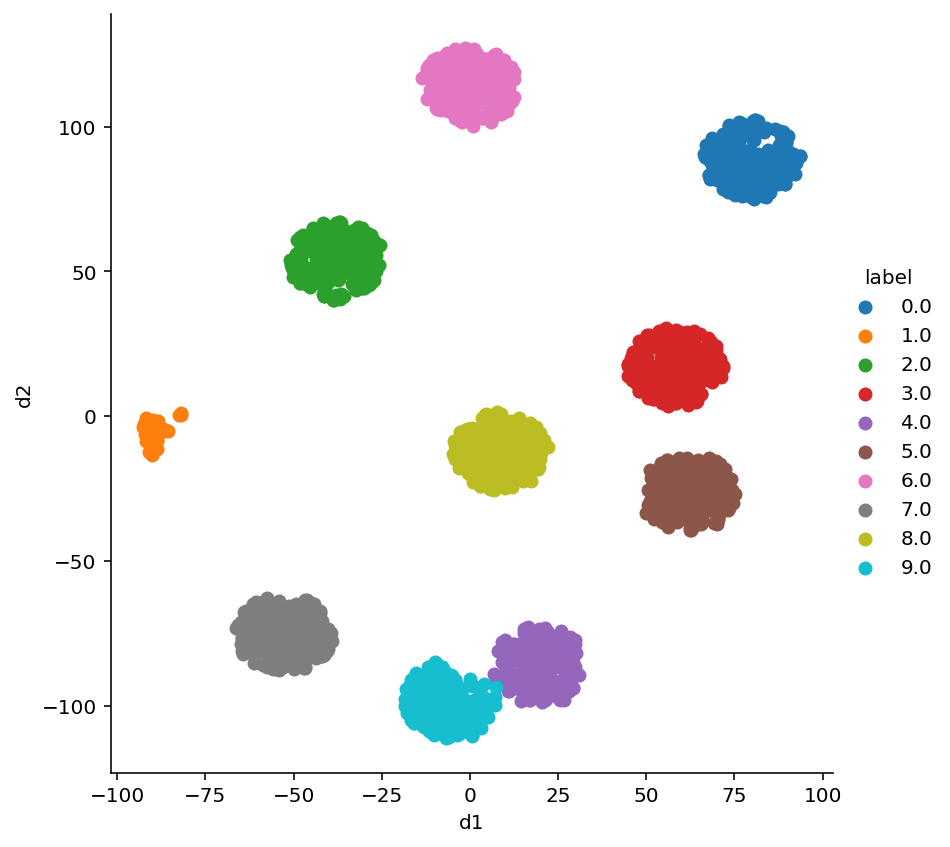

In [ ]:
import seaborn as sn
sn.FacetGrid(correct_tsnedf, hue="label", size=6).map(plt.scatter, "d1","d2").add_legend()
plt.show()

In [ ]:
correct_tsnedf.groupby('label').count().d1

label
0.0    217
1.0     45
2.0    242
3.0    248
4.0    217
5.0    229
6.0    246
7.0    257
8.0    241
9.0    195
Name: d1, dtype: int64

In [ ]:
correct_dataset = pd.DataFrame(columns=mnist.columns, dtype='int64')
correct_dataset = correct_datapoints.drop('label', axis=1)
correct_label = correct_datapoints.label
new_index = correct_datapoints.index

In [ ]:
print(correct_dataset.shape)

(2137, 784)


In [ ]:
complete_mnist = mnist.drop('label', axis=1)
complete_label = mnist.label

In [ ]:
# correct_pendigits = pd.DataFrame(columns=['x1','y1','x2','y2','x3','y3','x4','y4','x5','y5','x6','y6','x7','y7','x8','y8'],dtype='int64')
# np.random.seed(17)
new_index = [i for i in range(len(complete_mnist))]
dst = np.empty((0,8,28,28), int)
for i in range(len(new_index)):
    pts, kms, xys = feature_extractor(complete_mnist.iloc[int(new_index[i])].values, complete_label[int(new_index[i])], centroids, return_clusters=True)
    clusters = form_clusters(pts,xys)
    img = generate_image(kms, clusters, new_index[i], complete_mnist)
    dst = np.append(dst, np.array([img]), axis=0)

In [ ]:
dst.shape

(10000, 8, 28, 28)

In [ ]:
correct_datapoints.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [ ]:
correct_pendigits['label'] = correct_datapoints.iloc[:,0].values

In [ ]:
correct_pendigits.head

<bound method NDFrame.head of        x1  y1  x2  y2  x3  y3  x4  y4  x5  y5  x6  y6  x7  y7  x8  y8  label
0      16  28   7  23   2  14   1   3  11   0  21   5  26  15  25  26      0
1      16  28   9  20   3  12   5   3  12   0  20   4  24  13  23  22      0
2      16  28   6  19   3  10   4   2  12   0  20   4  24  12  22  21      0
3      15  28   8  23   4  12   5   3  13   0  21   5  23  13  21  21      0
4      11  28   5  22   2  13   2   2  12   0  22   4  25  16  22  26      0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
12633  16  15   7  17   8  23  14  27  20  28  19  19  14   7   9   0      9
12634   3   9   3  17  10  25  19  28  24  19  20  10  10   9  17   0      9
12635   9  10   4  14   7  22  14  24  20  28  23  20  18  10  17   0      9
12636  15  15   6  16   8  23  14  28  21  27  19  20  15   8  12   0      9
12637   8  15   6  22  12  26  19  28  21  21  15  18  16   9  12   0      9

[12638 rows x 17 columns]>

In [ ]:
correct_pendigits.to_csv('correct_pendigits.csv',index=False)

In [ ]:
#Changed for test data
new_index_test = list(new_index)

In [ ]:
import pickle
with open("new_index_test", "wb") as fp:
    pickle.dump(new_index_test, fp)

In [ ]:
dst.shape

(10000, 8, 28, 28)

In [ ]:
np.save("data_test_full.npy", dst)